## Prepate data to be parsed by open-sesame

In [2]:
import re
import nltk.data
import pandas as pd

datas = pandas.read_csv("C:/Users/Thiloshon/PycharmProjects/analogical-transfer-learning/dataset/02_aesop_fables_annotated.csv")

list(set(data['tag']))

['Betray', 'Content', 'Greed', 'Fool', 'Trust', 'Hardwork', 'Clever', 'Lazy']

In [ ]:
for tag in list(set(data['tag'])):

    data_filt = data[data.tag.apply(lambda x: x == tag)]

    with open('aesopmorals_for_framing_' + tag + '.txt', 'w', newline='') as f_output:
        for index, row in enumerate(data_filt['story']):
            tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

            for a in tokenizer.tokenize(row):
                f_output.write(a + "\n")
            f_output.write("YAHOO is my name" + "\n") # Line to seperate stories

## Analyse parsed frames

In [ ]:
# Most common frames in each tag

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [10, 10]

# Frames parsed from open-sesame
files = ["predicted-args-consequence.conll", "predicted-args-friends.conll", "predicted-args-true-nature.conll", 
         "predicted-args-trust.conll", "predicted-args-danger.conll", "predicted-args-worthiness.conll"]

for file in files:
    data = pd.read_csv(file, sep="\t", header=None)
    frames = []

    temp_story =[]
    skip = 4

    for index, row in data.iterrows():
        if row[1] == "yahoo" or skip < 4:
            if len(temp_story) > 0:
                frames.append(temp_story)
            temp_story = []
            skip = skip -1
            if (skip == 0):
                skip = 4
        else:
            if row[13] != "_" or (row[14] != "_" and row[14] != "O"):
                temp_story.append((row[1], row[12], row[13], row[14]))

    frames_ = [[b[2] for b in a] for a in frames]
    roles = [[b[3] for b in a] for a in frames]
    
    flat_list = [item for sublist in frames_ for item in sublist]
    
    w =Counter(flat_list)
    w = w.most_common(15)[0:14]
    
    plt.bar(range(len(w)), [val[1] for val in w], align='center')
    plt.xticks(range(len(w)), [val[0] for val in w])
    plt.xticks(rotation=70)
    plt.show()

predicted-args-consequence.conll


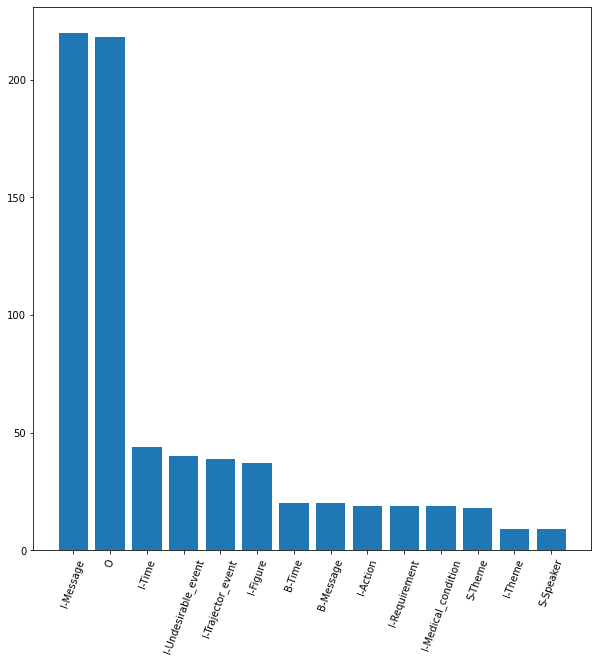

predicted-args-friends.conll


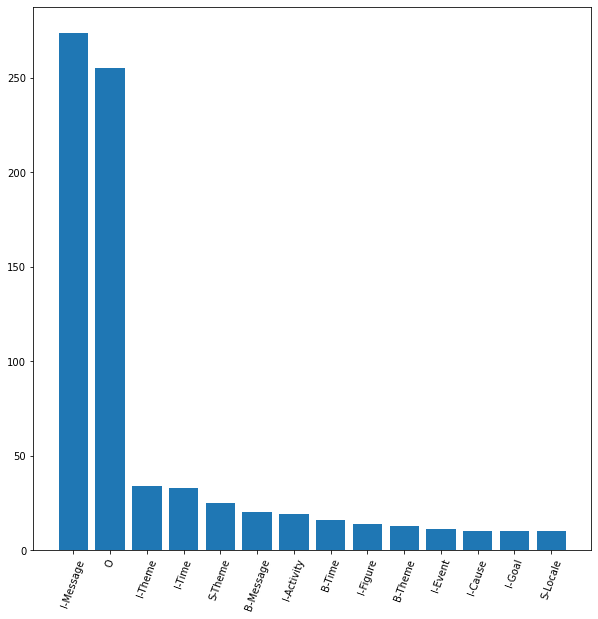

predicted-args-true-nature.conll


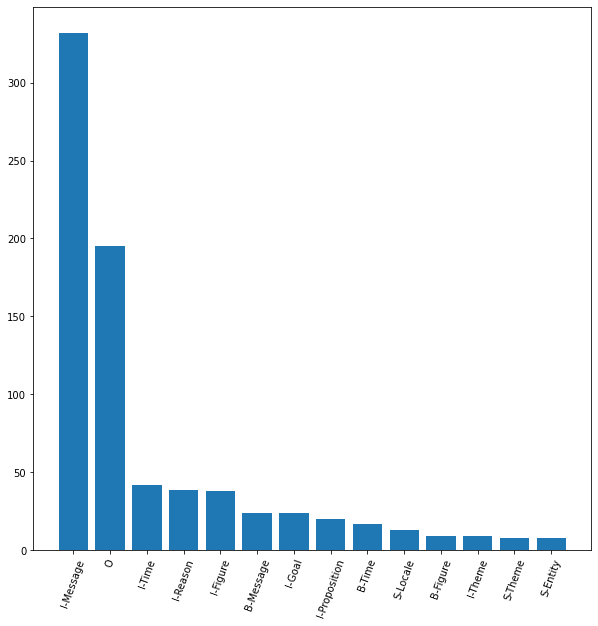

predicted-args-trust.conll


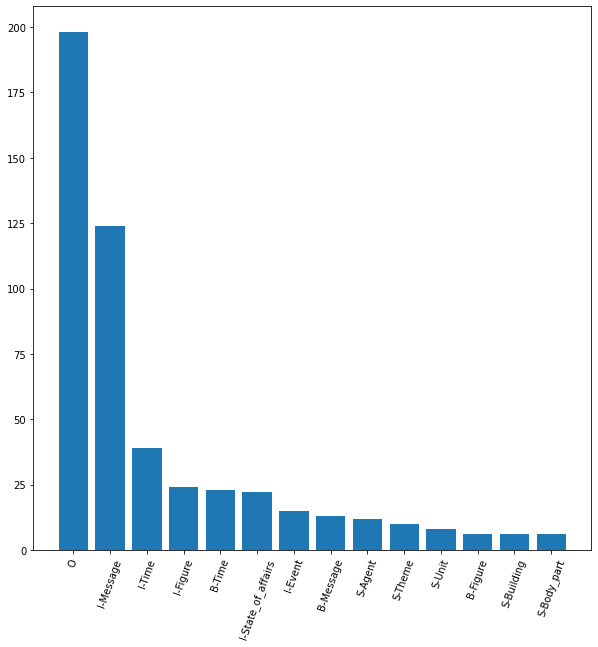

predicted-args-danger.conll


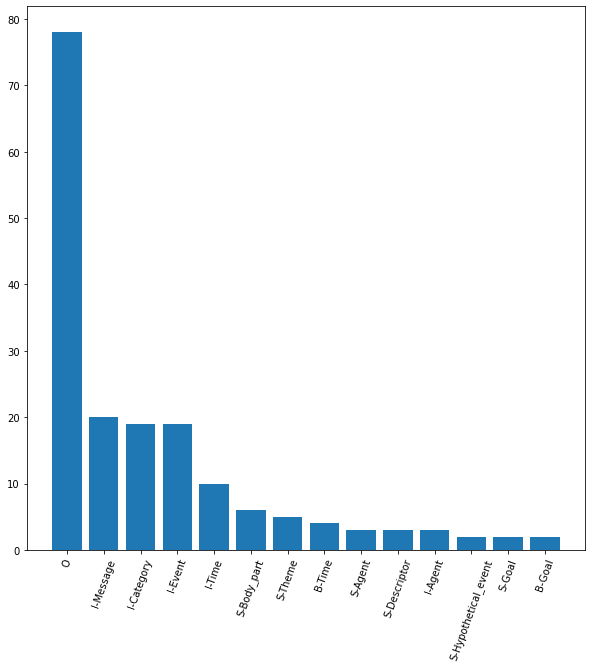

predicted-args-worthiness.conll


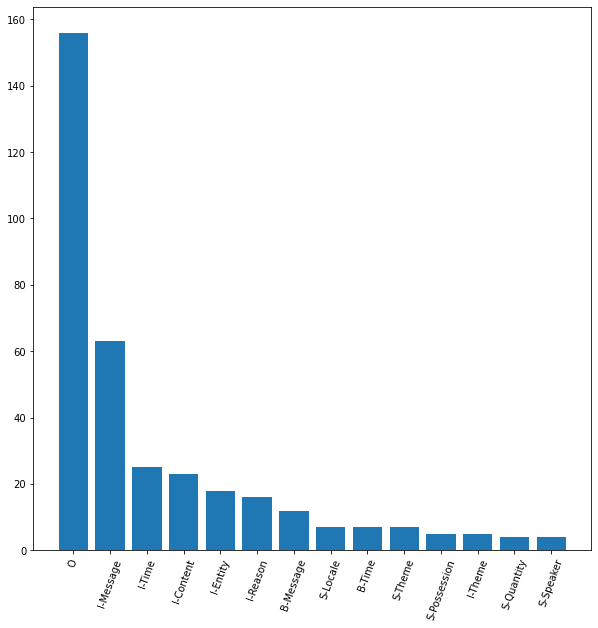

In [85]:
# Most common roles in each tag

files = ["predicted-args-consequence.conll", "predicted-args-friends.conll", "predicted-args-true-nature.conll", 
         "predicted-args-trust.conll", "predicted-args-danger.conll", "predicted-args-worthiness.conll"]


for file in files:
    data = pd.read_csv(file, sep="\t", header=None)
    frames = []

    temp_story =[]
    skip = 4

    for index, row in data.iterrows():
        if row[1] == "yahoo" or skip < 4:
            if len(temp_story) > 0:
                frames.append(temp_story)
            temp_story = []
            skip = skip -1
            if (skip == 0):
                skip = 4
        else:
            if row[13] != "_" or (row[14] != "_" and row[14] != "O"):
                temp_story.append((row[1], row[12], row[13], row[14]))

    frames_ = [[b[2] for b in a] for a in frames]
    roles = [[b[3] for b in a] for a in frames]

    flat_list = [item for sublist in roles for item in sublist]

    w =Counter(flat_list)
    w = w.most_common(15)[0:14]
    
    print(file)
    plt.bar(range(len(w)), [val[1] for val in w], align='center')
    plt.xticks(range(len(w)), [val[0] for val in w])
    plt.xticks(rotation=70)
    plt.show()


predicted-args-consequence.conll


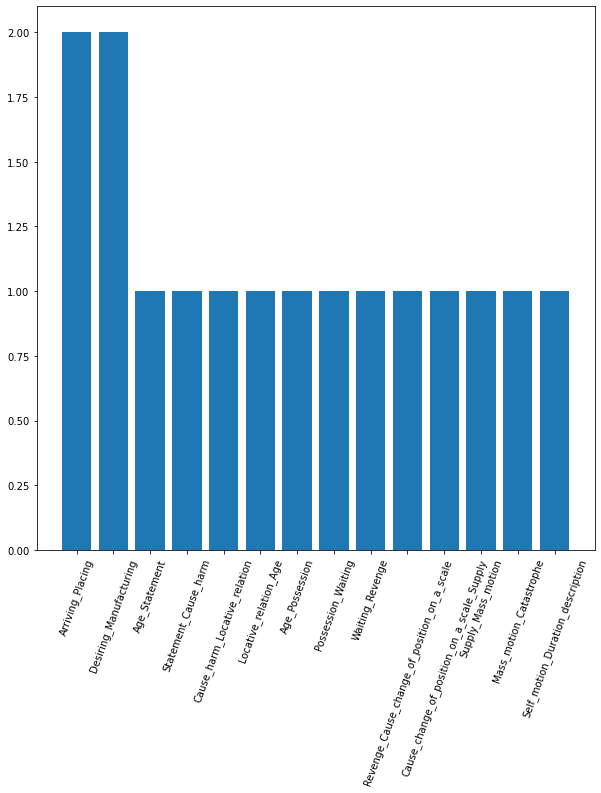

predicted-args-friends.conll


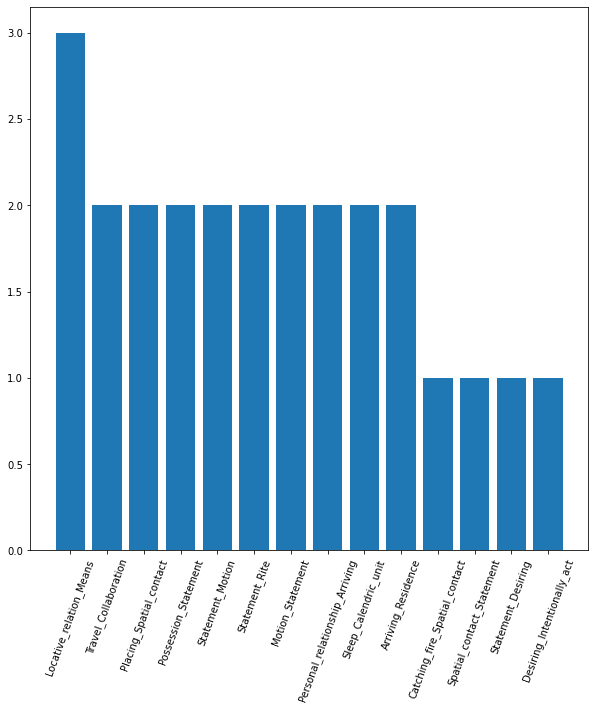

predicted-args-true-nature.conll


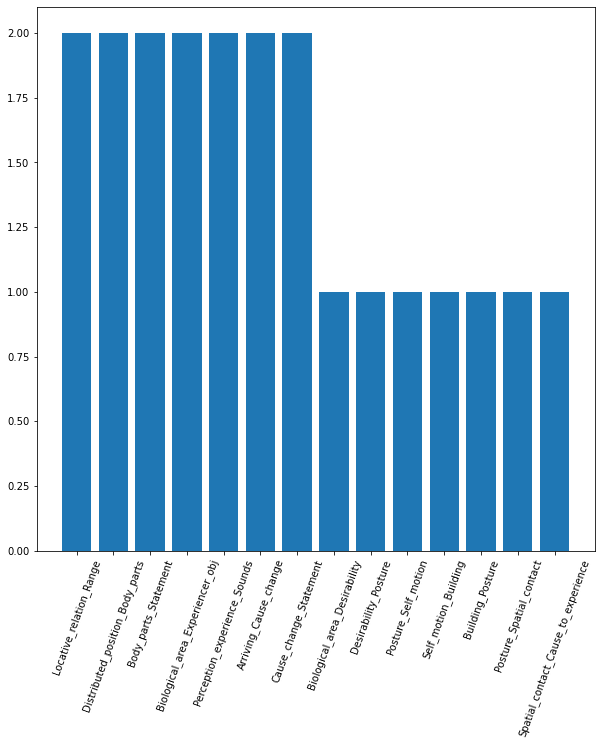

predicted-args-trust.conll


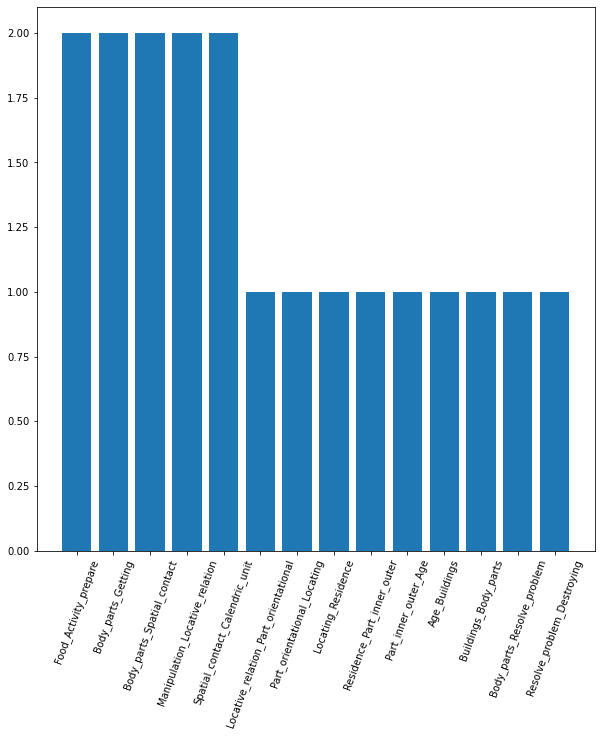

predicted-args-danger.conll


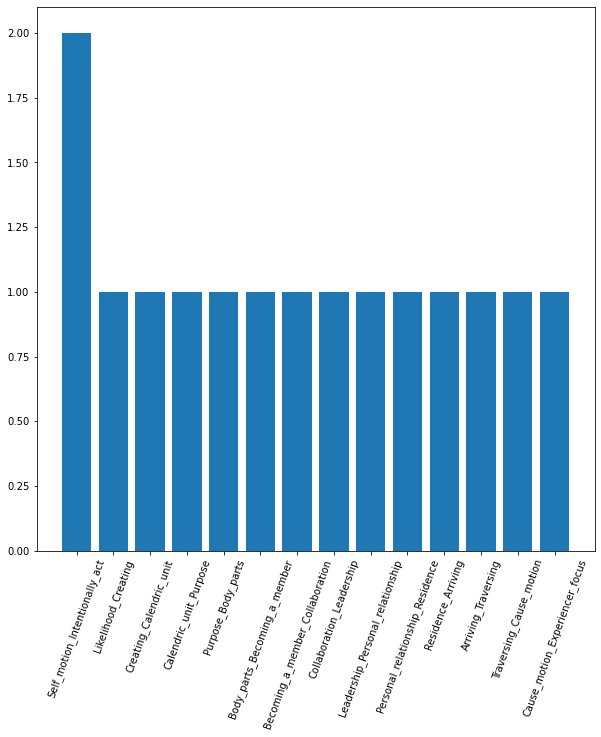

predicted-args-worthiness.conll


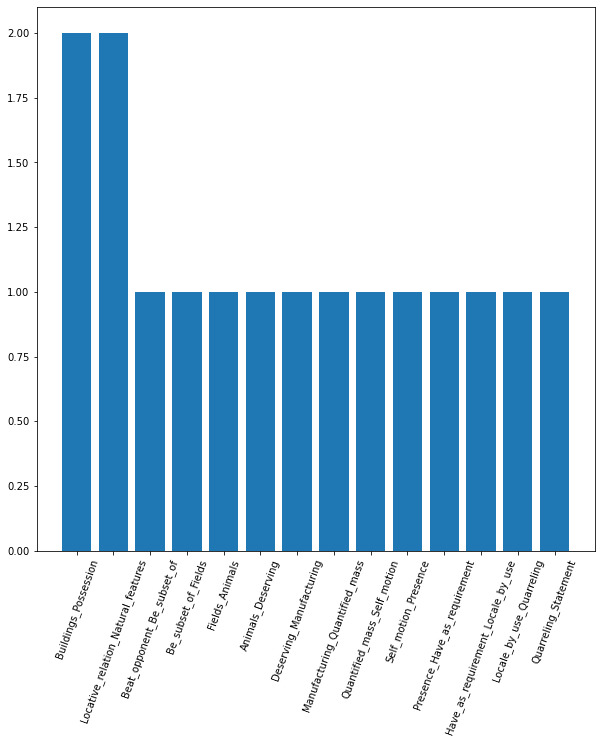

In [86]:
# Most common bi frames

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from nltk.util import ngrams

# lu = data[12]
# frame = data[13]
# role = data[14]

files = ["predicted-args-consequence.conll", "predicted-args-friends.conll", "predicted-args-true-nature.conll", 
         "predicted-args-trust.conll", "predicted-args-danger.conll", "predicted-args-worthiness.conll"]

for file in files:
    data = pd.read_csv(file, sep="\t", header=None)
    frames = []

    temp_story =[]
    skip = 4

    for index, row in data.iterrows():
        if row[1] == "yahoo" or skip < 4:
            if len(temp_story) > 0:
                
                frames_ = [b[2] for b in temp_story if b[2] != "_"]
                bigram = list(ngrams(frames_, 2)) 
                frames.append([(a[0] + "_" + a[1]) for a in bigram])
                
            temp_story = []
            skip = skip -1
            if (skip == 0):
                skip = 4
        else:
            if row[13] != "_" or (row[14] != "_" and row[14] != "O"):
                temp_story.append((row[1], row[12], row[13], row[14]))


    flat_list = [item for sublist in frames for item in sublist]
    
    print

    w =Counter(flat_list)
    w = w.most_common(15)[0:14]
    
    print(file)
    plt.bar(range(len(w)), [val[1] for val in w], align='center')
    plt.xticks(range(len(w)), [val[0] for val in w])
    plt.xticks(rotation=70)
    plt.show()



## Predicting tags from frames

In [ ]:
# Data Creation for Frame NNet

# All frames

files = ["predicted-args-consequence.conll", "predicted-args-content.conll", "predicted-args-true-nature.conll", 
         "predicted-args-danger.conll", "predicted-args-effort.conll", "predicted-args-flattery.conll",
        "predicted-args-friends.conll", "predicted-args-greed.conll", "predicted-args-lazy.conll", 
         "predicted-args-learn.conll", "predicted-args-opportunity.conll", "predicted-args-respect.conll",
        "predicted-args-trust.conll", "predicted-args-worthiness.conll", "predicted-args-weak.conll"]

main_df = pd.DataFrame()
inasd = 0

for file in files:
    data = pd.read_csv(file, sep="\t", header=None)
    frames = []

    temp_story =[]
    skip = 4

    for index, row in data.iterrows():
        if row[1] == "yahoo" or skip < 4:
            if len(temp_story) > 0:
                frames.append(temp_story)
                inasd = inasd + 1
            temp_story = []
            skip = skip -1
            if (skip == 0):
                skip = 4
        else:
            if row[13] != "_":
                temp_story.append(row[13])
                
    a = (pd.get_dummies(
    pd.DataFrame(frames), prefix='', prefix_sep='')
   .groupby(level=0, axis=1)
   .sum())

    a['tag'] = file
    
    main_df = main_df.append(a, ignore_index = True)
    
main_df.fillna(0, inplace=True)
main_df.to_csv("frames_nnet_data.csv")

In [4]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

datas= pd.read_csv("C:/Users/Thiloshon/PycharmProjects/analogical-transfer-learning/frames_nnet_data.csv")
datas = datas.sample(frac = 1)

Y = datas['tag']
del datas['Unnamed: 0']
del datas['tag']

datas=(datas-datas.mean())/datas.std()
print(Y.shape)

dataset = datas.values
X = dataset.astype(float)

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y = dummy_y

print(dummy_y.shape)
print(Y)
print(X.shape)

(116,)
(116, 15)
114           predicted-args-weak.conll
6      predicted-args-consequence.conll
45          predicted-args-effort.conll
32     predicted-args-true-nature.conll
102     predicted-args-worthiness.conll
                     ...               
36          predicted-args-danger.conll
34          predicted-args-danger.conll
70           predicted-args-greed.conll
12     predicted-args-consequence.conll
94           predicted-args-trust.conll
Name: tag, Length: 116, dtype: object
(116, 352)


In [146]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2)

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=18, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1.), metrics=['accuracy'])
    return model

model = baseline_model()
model.fit(x_train, y_train, verbose=1, epochs=300)

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)

print(y_pred_class)
print(np.argmax(y_test, axis=1))

confusion_matrix(y_pred_class, np.argmax(y_test, axis=1))


Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 0.7000 - accuracy: 0.4815
Epoch 2/300
1/1 [==============================] - 0s 14ms/step - loss: 0.6978 - accuracy: 0.4815
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 0.6956 - accuracy: 0.4815
Epoch 4/300
1/1 [==============================] - 0s 24ms/step - loss: 0.6935 - accuracy: 0.4815
Epoch 5/300
1/1 [==============================] - 0s 15ms/step - loss: 0.6914 - accuracy: 0.4815
Epoch 6/300
1/1 [==============================] - 0s 20ms/step - loss: 0.6893 - accuracy: 0.4815
Epoch 7/300
1/1 [==============================] - 0s 15ms/step - loss: 0.6871 - accuracy: 0.4815
Epoch 8/300
1/1 [==============================] - 0s 17ms/step - loss: 0.6850 - accuracy: 0.4815
Epoch 9/300
1/1 [==============================] - 0s 15ms/step - loss: 0.6829 - accuracy: 0.5185
Epoch 10/300
1/1 [==============================] - 0s 11ms/step - loss: 0.6808 - accuracy: 0.5185
Epoch 11/300
1/1 [===

1/1 [==============================] - 0s 10ms/step - loss: 0.4323 - accuracy: 0.9630
Epoch 167/300
1/1 [==============================] - 0s 10ms/step - loss: 0.4311 - accuracy: 0.9630
Epoch 168/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4299 - accuracy: 0.9630
Epoch 169/300
1/1 [==============================] - 0s 7ms/step - loss: 0.4286 - accuracy: 0.9630
Epoch 170/300
1/1 [==============================] - 0s 4ms/step - loss: 0.4274 - accuracy: 0.9630
Epoch 171/300
1/1 [==============================] - 0s 9ms/step - loss: 0.4262 - accuracy: 0.9630
Epoch 172/300
1/1 [==============================] - 0s 16ms/step - loss: 0.4250 - accuracy: 0.9630
Epoch 173/300
1/1 [==============================] - 0s 11ms/step - loss: 0.4238 - accuracy: 0.9630
Epoch 174/300
1/1 [==============================] - 0s 10ms/step - loss: 0.4226 - accuracy: 0.9630
Epoch 175/300
1/1 [==============================] - 0s 10ms/step - loss: 0.4214 - accuracy: 0.9630
Epoch 176/300
1/1

array([[3, 2],
       [1, 1]], dtype=int64)

Epoch 1/300
23/23 [==============================] - 2s 19ms/step - loss: 3.1031 - accuracy: 0.0326 - val_loss: 2.7470 - val_accuracy: 0.0000e+00
Epoch 2/300
23/23 [==============================] - 0s 10ms/step - loss: 3.0120 - accuracy: 0.0761 - val_loss: 2.7431 - val_accuracy: 0.0000e+00
Epoch 3/300
23/23 [==============================] - 0s 11ms/step - loss: 3.0890 - accuracy: 0.0761 - val_loss: 2.7387 - val_accuracy: 0.0000e+00
Epoch 4/300
23/23 [==============================] - 0s 10ms/step - loss: 3.0864 - accuracy: 0.0543 - val_loss: 2.7356 - val_accuracy: 0.0000e+00
Epoch 5/300
23/23 [==============================] - 0s 10ms/step - loss: 3.0877 - accuracy: 0.0652 - val_loss: 2.7332 - val_accuracy: 0.0000e+00
Epoch 6/300
23/23 [==============================] - 0s 10ms/step - loss: 3.0318 - accuracy: 0.0652 - val_loss: 2.7317 - val_accuracy: 0.0000e+00
Epoch 7/300
23/23 [==============================] - 0s 14ms/step - loss: 3.0962 - accuracy: 0.0978 - val_loss: 2.7290 - val

23/23 [==============================] - 0s 11ms/step - loss: 2.8034 - accuracy: 0.0652 - val_loss: 2.6795 - val_accuracy: 0.0000e+00
Epoch 58/300
23/23 [==============================] - 0s 9ms/step - loss: 2.7569 - accuracy: 0.0978 - val_loss: 2.6792 - val_accuracy: 0.0000e+00
Epoch 59/300
23/23 [==============================] - 0s 8ms/step - loss: 2.7876 - accuracy: 0.0978 - val_loss: 2.6780 - val_accuracy: 0.0000e+00
Epoch 60/300
23/23 [==============================] - 0s 8ms/step - loss: 2.6067 - accuracy: 0.1413 - val_loss: 2.6770 - val_accuracy: 0.0000e+00
Epoch 61/300
23/23 [==============================] - 0s 8ms/step - loss: 2.7149 - accuracy: 0.1087 - val_loss: 2.6764 - val_accuracy: 0.0000e+00
Epoch 62/300
23/23 [==============================] - 0s 9ms/step - loss: 2.6612 - accuracy: 0.0761 - val_loss: 2.6761 - val_accuracy: 0.0000e+00
Epoch 63/300
23/23 [==============================] - 0s 8ms/step - loss: 2.6354 - accuracy: 0.1522 - val_loss: 2.6767 - val_accuracy: 0

23/23 [==============================] - 0s 7ms/step - loss: 2.4096 - accuracy: 0.2283 - val_loss: 2.6494 - val_accuracy: 0.0500
Epoch 171/300
23/23 [==============================] - 0s 7ms/step - loss: 2.4793 - accuracy: 0.1522 - val_loss: 2.6491 - val_accuracy: 0.1000
Epoch 172/300
23/23 [==============================] - 0s 7ms/step - loss: 2.3156 - accuracy: 0.2174 - val_loss: 2.6489 - val_accuracy: 0.1000
Epoch 173/300
23/23 [==============================] - 0s 16ms/step - loss: 2.4126 - accuracy: 0.1739 - val_loss: 2.6485 - val_accuracy: 0.1000
Epoch 174/300
23/23 [==============================] - 0s 16ms/step - loss: 2.3345 - accuracy: 0.2717 - val_loss: 2.6490 - val_accuracy: 0.1000
Epoch 175/300
23/23 [==============================] - 0s 10ms/step - loss: 2.2837 - accuracy: 0.2826 - val_loss: 2.6488 - val_accuracy: 0.1000
Epoch 176/300
23/23 [==============================] - 0s 10ms/step - loss: 2.3046 - accuracy: 0.2391 - val_loss: 2.6474 - val_accuracy: 0.1000
Epoch 177

23/23 [==============================] - 0s 10ms/step - loss: 1.9306 - accuracy: 0.3587 - val_loss: 2.6688 - val_accuracy: 0.1000
Epoch 285/300
23/23 [==============================] - 0s 16ms/step - loss: 1.9481 - accuracy: 0.3913 - val_loss: 2.6702 - val_accuracy: 0.1000
Epoch 286/300
23/23 [==============================] - 0s 8ms/step - loss: 1.9388 - accuracy: 0.3587 - val_loss: 2.6718 - val_accuracy: 0.1000
Epoch 287/300
23/23 [==============================] - 0s 7ms/step - loss: 1.9452 - accuracy: 0.3804 - val_loss: 2.6734 - val_accuracy: 0.1000
Epoch 288/300
23/23 [==============================] - 0s 8ms/step - loss: 1.9425 - accuracy: 0.4348 - val_loss: 2.6742 - val_accuracy: 0.1000
Epoch 289/300
23/23 [==============================] - 0s 7ms/step - loss: 1.8951 - accuracy: 0.3804 - val_loss: 2.6744 - val_accuracy: 0.1000
Epoch 290/300
23/23 [==============================] - 0s 9ms/step - loss: 1.9831 - accuracy: 0.3804 - val_loss: 2.6748 - val_accuracy: 0.1000
Epoch 291/3

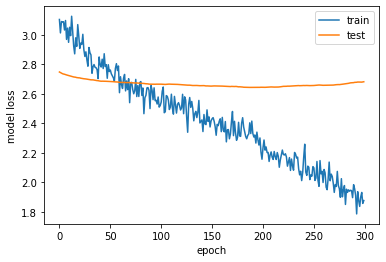

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

dataset=tf.data.Dataset.from_tensor_slices((X, dummy_y))
val_data_size=int(0.2*116)

val_ds=dataset.take(val_data_size).batch(4, drop_remainder=True)
train_ds=dataset.skip(val_data_size).batch(4, drop_remainder=True)
train_ds = train_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(512, input_dim=X.shape[1], activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(15, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, clipnorm=1.), metrics=['accuracy'])
    return model

model = baseline_model()
    
history=model.fit(train_ds, validation_data=val_ds, epochs=300, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('train_history.png')
plt.show()

y = np.concatenate([y for x, y in val_ds], axis=0)
print(np.argmax(y, axis=1))
print(np.argmax(model.predict(val_ds), axis=1))

In [19]:
# retaining only the common frames in each tag

from collections import Counter

files = ["predicted-args-consequence.conll", "predicted-args-content.conll", "predicted-args-true-nature.conll", 
         "predicted-args-danger.conll", "predicted-args-effort.conll", "predicted-args-flattery.conll",
        "predicted-args-friends.conll", "predicted-args-greed.conll", "predicted-args-lazy.conll", 
         "predicted-args-learn.conll", "predicted-args-opportunity.conll", "predicted-args-respect.conll",
        "predicted-args-trust.conll", "predicted-args-worthiness.conll", "predicted-args-weak.conll"]

common_frames_all = []

for file in files:
    data = pd.read_csv(file, sep="\t", header=None)
    frames = []

    temp_story =[]
    skip = 4

    for index, row in data.iterrows():
        if row[1] == "yahoo" or skip < 4:
            if len(temp_story) > 0:
                frames.append(temp_story)
            temp_story = []
            skip = skip -1
            if (skip == 0):
                skip = 4
        else:
            if row[13] != "_" or (row[14] != "_" and row[14] != "O"):
                temp_story.append((row[1], row[12], row[13], row[14]))

    frames_ = [[b[2] for b in a] for a in frames]
    roles = [[b[3] for b in a] for a in frames]

    flat_list = [item for sublist in frames_ for item in sublist]

    w =Counter(flat_list)
    w = w.most_common(15)[1:14]

    common_frames_all.append(w)

flat_list = [item[0] for sublist in common_frames_all for item in sublist]

features = list(set(flat_list))
print(len(features))


70


In [100]:
# Data for one-vs-one

main_df = pd.DataFrame()
inasd = 0
features.append("tag")

for file in files:
    data = pd.read_csv(file, sep="\t", header=None)
    frames = []

    temp_story =[]
    skip = 4

    for index, row in data.iterrows():
        if row[1] == "yahoo" or skip < 4:
            if len(temp_story) > 0:
                frames.append(temp_story)
                inasd = inasd + 1
            temp_story = []
            skip = skip -1
            if (skip == 0):
                skip = 4
        else:
            if row[13] != "_":
                temp_story.append(row[13])
                
    a = (pd.get_dummies(
    pd.DataFrame(frames), prefix='', prefix_sep='')
   .groupby(level=0, axis=1)
   .sum())

    a['tag'] = file
        
    main_df = main_df.append(a, ignore_index = True)
    
main_df.fillna(0, inplace=True)
print(main_df.shape)
main_df = main_df[features]
print(main_df.shape)
main_df.to_csv("frames_nnet_data_trust_danger.csv")

(14, 160)
(14, 25)


In [85]:
# Learning one-vs-one

datas= pd.read_csv("C:/Users/Thiloshon/PycharmProjects/analogical-transfer-learning/frames_nnet_data_consequence_worthy.csv")
datas = datas.sample(frac = 1)

Y = datas['tag']
del datas['Unnamed: 0']
del datas['tag']

datas=(datas-datas.mean())/datas.std()

print(Y.shape)

dataset = datas.values
X = dataset.astype(float)

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y = dummy_y

print(dummy_y.shape)
print(X.shape)
print(Y)

(23,)
(23, 2)
(23, 20)
5     predicted-args-consequence.conll
16     predicted-args-worthiness.conll
7     predicted-args-consequence.conll
22     predicted-args-worthiness.conll
2     predicted-args-consequence.conll
19     predicted-args-worthiness.conll
4     predicted-args-consequence.conll
10    predicted-args-consequence.conll
8     predicted-args-consequence.conll
6     predicted-args-consequence.conll
1     predicted-args-consequence.conll
9     predicted-args-consequence.conll
3     predicted-args-consequence.conll
15     predicted-args-worthiness.conll
0     predicted-args-consequence.conll
17     predicted-args-worthiness.conll
14     predicted-args-worthiness.conll
11    predicted-args-consequence.conll
13     predicted-args-worthiness.conll
21     predicted-args-worthiness.conll
18     predicted-args-worthiness.conll
12    predicted-args-consequence.conll
20     predicted-args-worthiness.conll
Name: tag, dtype: object


20
23
Epoch 1/200
8/8 [==============================] - 1s 32ms/step - loss: 0.7043 - accuracy: 0.2500 - val_loss: 0.7043 - val_accuracy: 0.5000
Epoch 2/200
8/8 [==============================] - 0s 9ms/step - loss: 0.7042 - accuracy: 0.2500 - val_loss: 0.7044 - val_accuracy: 0.5000
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7041 - accuracy: 0.2500 - val_loss: 0.7044 - val_accuracy: 0.5000
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 0.7040 - accuracy: 0.3125 - val_loss: 0.7044 - val_accuracy: 0.5000
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7039 - accuracy: 0.3125 - val_loss: 0.7044 - val_accuracy: 0.5000
Epoch 6/200
8/8 [==============================] - 0s 9ms/step - loss: 0.7039 - accuracy: 0.3125 - val_loss: 0.7045 - val_accuracy: 0.5000
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7038 - accuracy: 0.3125 - val_loss: 0.7045 - val_accuracy: 0.5000
Epoch 8/200
8/8 [===

8/8 [==============================] - 0s 8ms/step - loss: 0.6948 - accuracy: 0.6250 - val_loss: 0.7080 - val_accuracy: 0.5000
Epoch 118/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6947 - accuracy: 0.6250 - val_loss: 0.7080 - val_accuracy: 0.5000
Epoch 119/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.6875 - val_loss: 0.7081 - val_accuracy: 0.5000
Epoch 120/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6946 - accuracy: 0.6875 - val_loss: 0.7081 - val_accuracy: 0.5000
Epoch 121/200
8/8 [==============================] - 0s 11ms/step - loss: 0.6945 - accuracy: 0.6875 - val_loss: 0.7081 - val_accuracy: 0.5000
Epoch 122/200
8/8 [==============================] - 0s 12ms/step - loss: 0.6944 - accuracy: 0.6875 - val_loss: 0.7082 - val_accuracy: 0.5000
Epoch 123/200
8/8 [==============================] - 0s 12ms/step - loss: 0.6943 - accuracy: 0.6875 - val_loss: 0.7082 - val_accuracy: 0.5000
Epoch 124/200
8/8 [=====

8/8 [==============================] - 0s 7ms/step - loss: 0.6902 - accuracy: 0.7500 - val_loss: 0.7098 - val_accuracy: 0.5000
Epoch 176/200
8/8 [==============================] - 0s 14ms/step - loss: 0.6902 - accuracy: 0.7500 - val_loss: 0.7099 - val_accuracy: 0.5000
Epoch 177/200
8/8 [==============================] - 0s 21ms/step - loss: 0.6901 - accuracy: 0.7500 - val_loss: 0.7099 - val_accuracy: 0.5000
Epoch 178/200
8/8 [==============================] - 0s 21ms/step - loss: 0.6900 - accuracy: 0.7500 - val_loss: 0.7099 - val_accuracy: 0.5000
Epoch 179/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6899 - accuracy: 0.7500 - val_loss: 0.7100 - val_accuracy: 0.5000
Epoch 180/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.7500 - val_loss: 0.7100 - val_accuracy: 0.5000
Epoch 181/200
8/8 [==============================] - 0s 10ms/step - loss: 0.6898 - accuracy: 0.7500 - val_loss: 0.7100 - val_accuracy: 0.5000
Epoch 182/200
8/8 [====

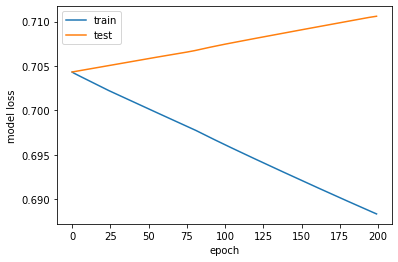

[0 1 0 1 0 1]
[1 1 0 0 0 0]


In [87]:
import numpy as np

print(X.shape[1])
print(len(Y))

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
    #model.add(keras.layers.Dropout(0.1))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, clipnorm=1.), metrics=['accuracy'])
    return model


dataset=tf.data.Dataset.from_tensor_slices((X, dummy_y)) #Create a tensorflow dataset
#train test split, we use 30% of the data for validation
val_data_size=int(0.3*len(Y))

val_ds=dataset.take(val_data_size).batch(2, drop_remainder=True)
train_ds=dataset.skip(val_data_size).batch(2, drop_remainder=True)
train_ds = train_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

model = baseline_model()
history=model.fit(train_ds, validation_data=val_ds, epochs=200, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('train_history.png')
plt.show()
y = np.concatenate([y for x, y in val_ds], axis=0)
print(np.argmax(y, axis=1))
print(np.argmax(model.predict(val_ds), axis=1))

In [ ]:
# friends, nature one-vs-one

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, clipnorm=1.), metrics=['accuracy'])
    return model

dataset=tf.data.Dataset.from_tensor_slices((X, dummy_y)) 
val_data_size=int(0.25*len(Y))
val_ds=dataset.take(val_data_size).batch(4, drop_remainder=True)
train_ds=dataset.skip(val_data_size).batch(4, drop_remainder=True)
train_ds = train_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

model = baseline_model()
history=model.fit(train_ds, validation_data=val_ds, epochs=100, verbose=1)

In [300]:
# Logistic regression for learning cluster - 100 iterations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

datas= pd.read_csv("C:/Users/Thiloshon/PycharmProjects/analogical-transfer-learning/frames_nnet_data_few.csv")

tag_name = "predicted-args-consequence.conll"

df1 = datas[datas['tag'] == tag_name]
df2 = datas[datas['tag'] != tag_name]

print(df1.shape)

accuracies = []

for ind in range(0, 100):
    
    df3 = df2.sample(df1.shape[0])
    final_df = df1.append(df3, ignore_index=True)
    final_df = final_df.sample(frac = 1)

    Y = final_df['tag']
    del final_df['Unnamed: 0']
    del final_df['tag']

    dataset = final_df.values
    X = dataset.astype(float)
    Y_binary = [1 if a == tag_name else 0 for a in Y]

    X_train, X_test, y_train, y_test = train_test_split(X, Y_binary, test_size=0.2)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = pd.Series(model.predict(X_test))

    acc = f1_score(y_test, y_pred)
    accuracies.append(acc)

    print("Test accuracy: ", acc)

(13, 72)
Test accuracy:  0.3333333333333333
Test accuracy:  0.4
Test accuracy:  0.5
Test accuracy:  0.3333333333333333
Test accuracy:  0.4
Test accuracy:  0.28571428571428575
Test accuracy:  0.28571428571428575
Test accuracy:  0.5714285714285715
Test accuracy:  0.0
Test accuracy:  0.3333333333333333
Test accuracy:  0.5
Test accuracy:  0.0
Test accuracy:  0.28571428571428575
Test accuracy:  0.3333333333333333
Test accuracy:  0.3333333333333333
Test accuracy:  0.0
Test accuracy:  0.28571428571428575
Test accuracy:  0.6666666666666665
Test accuracy:  0.5
Test accuracy:  0.6666666666666666
Test accuracy:  0.5
Test accuracy:  0.28571428571428575
Test accuracy:  0.5
Test accuracy:  0.5
Test accuracy:  0.2857142857142857
Test accuracy:  0.0
Test accuracy:  0.4
Test accuracy:  0.6666666666666666
Test accuracy:  0.7499999999999999
Test accuracy:  0.0
Test accuracy:  0.0
Test accuracy:  0.0
Test accuracy:  0.3333333333333333
Test accuracy:  0.4
Test accuracy:  0.28571428571428575
Test accuracy: 

In [301]:
from statistics import mean
from sklearn.metrics import f1_score

mean(accuracies)

0.3691190476190476

In [68]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    # iterate over each label and check
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
    # compute the accuracy
    accuracy = correct_predictions/len(y_true)
    return accuracy

In [4]:
## BERT KNN for story from frames

files = ["predicted-args-consequence.conll", "predicted-args-content.conll", 
         "predicted-args-danger.conll", "predicted-args-effort.conll", "predicted-args-flattery.conll",
        "predicted-args-friends.conll", "predicted-args-greed.conll", "predicted-args-lazy.conll", 
         "predicted-args-learn.conll", "predicted-args-opportunity.conll", "predicted-args-respect.conll",
         "predicted-args-true-nature.conll", "predicted-args-trust.conll", "predicted-args-worthiness.conll", "predicted-args-weak.conll"]

frames_word = []
tag = []

for file in files:
    data = pd.read_csv(file, sep="\t", header=None)
    frames = []

    temp_story =[]
    skip = 4

    for index, row in data.iterrows():
        if row[1] == "yahoo" or skip < 4:
            if len(temp_story) > 0:
                frames.append(temp_story)
                frames_word.append(" ".join(temp_story))
                tag.append(file)
            temp_story = []
            skip = skip -1
            if (skip == 0):
                skip = 4
        else:
            if row[13] != "_":
                temp_story.append(row[13])
                
a = pd.DataFrame({"frames": frames_word, "tag" : tag})
a.to_csv("framesword_asis.csv")
    

                                                frames  \
0    Age Statement Cause_harm Locative_relation Age...   
1    Self_motion Duration_description Relational_na...   
2    Travel Buildings Calendric_unit Position_on_a_...   
3    Hostile_encounter Participation Cause_change E...   
4    Locating Activity_ongoing Ambient_temperature ...   
..                                                 ...   
111  Collaboration Destroying Increment Giving Ordi...   
112  Locating Body_parts Activity_start Part_piece ...   
113  Arriving Quantified_mass Quantified_mass Placi...   
114  Residence Identicality Leadership Subordinates...   
115  Sleep Change_of_leadership Locative_relation K...   

                                  tag  
0    predicted-args-consequence.conll  
1    predicted-args-consequence.conll  
2    predicted-args-consequence.conll  
3    predicted-args-consequence.conll  
4    predicted-args-consequence.conll  
..                                ...  
111         predicted-a

In [ ]:
# clusteing with bert based frame sequence

from transformers import RobertaTokenizer, RobertaForSequenceClassification
import pandas
import numpy as np
import tensorflow as tf
import torch
import transformers as ppb

datas = pandas.read_csv("C:/Users/Thiloshon/PycharmProjects/analogical-transfer-learning/framesword.csv")

labels = list(datas['tag'])
morals = list(datas['frames'])

print(len(labels))

# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

tokenized = datas["frames"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask, output_hidden_states= True)
    last_hidden_states = last_hidden_states["hidden_states"]

In [13]:
# get hidden state

frame_embed = []
for index in range(0, 116):
    frame_embed.append(last_hidden_states[index][0].numpy())
    
print(torch.tensor(frame_embed))

tensor([[ 0.1664, -0.0541, -0.0014,  ..., -0.0811,  0.0794,  0.0155],
        [ 0.1664, -0.0541, -0.0014,  ..., -0.0811,  0.0794,  0.0155],
        [ 0.1664, -0.0541, -0.0014,  ..., -0.0811,  0.0794,  0.0155],
        ...,
        [ 0.1664, -0.0541, -0.0014,  ..., -0.0811,  0.0794,  0.0155],
        [ 0.1664, -0.0541, -0.0014,  ..., -0.0811,  0.0794,  0.0155],
        [ 0.1664, -0.0541, -0.0014,  ..., -0.0811,  0.0794,  0.0155]])


C:\Users\Thiloshon\.conda\envs\yt\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  """


In [54]:
# clusteing with bert based frame sequence and attention mask

datas = pandas.read_csv("C:/Users/Thiloshon/PycharmProjects/analogical-transfer-learning/framesword.csv")
datas = datas.sample(frac = 1)

labels = list(datas['tag'])
morals = list(datas['frames'])


# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

tokenized = datas["frames"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)
print(attention_mask.shape)

input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

     Unnamed: 0                                             frames  \
2             2  Travel Buildings Calendric unit Position on a ...   
64           64  Avoiding Arriving Natural features Possession ...   
92           92  Locating Age Theft People by residence Evidenc...   
18           18  Request Political locales Personal relationshi...   
113         113  Arriving Quantified mass Quantified mass Placi...   
..          ...                                                ...   
16           16  Education teaching Taking time Social event Ca...   
19           19  Biological area Desirability Posture Self moti...   
0             0  Age Statement Cause harm Locative relation Age...   
97           97  Typicality Completeness Expansion Clothing Mov...   
69           69  Calendric unit Dressing Arriving Means Ground ...   

                                  tag  
2    predicted-args-consequence.conll  
64       predicted-args-friends.conll  
92         predicted-args-trust.conll  

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


2      [0, 39258, 34566, 2912, 1397, 4063, 1933, 2135...
64     [0, 46062, 154, 14498, 6645, 7278, 1575, 24330...
92     [0, 574, 18106, 8927, 27788, 1806, 30, 5238, 2...
18     [0, 45589, 10316, 400, 293, 13129, 1291, 14498...
113    [0, 8138, 1069, 6645, 28256, 3786, 2862, 28256...
                             ...                        
16     [0, 39594, 5307, 10883, 86, 3574, 515, 2912, 1...
19     [0, 387, 35948, 443, 4762, 853, 4484, 1869, 24...
0      [0, 39006, 19356, 24197, 4798, 15471, 3693, 93...
97     [0, 47572, 3569, 1571, 4556, 8293, 42883, 3240...
69     [0, 15117, 1397, 4063, 1933, 211, 9828, 14498,...
Name: frames, Length: 116, dtype: object
(116, 185)
(116, 185)


In [55]:
# Fine-tuning embedding

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

categories=sorted(list(set(labels))) #set will return the unique different entries
n_categories=len(categories)
n_elements = len(morals)

def indicize_labels(labels):
    """Transforms string labels into indices"""
    indices=[]
    for j in range(len(labels)):
        for i in range(n_categories):
            if labels[j]==categories[i]:
                indices.append(i)
    return indices

indices=indicize_labels(labels)

dataset=tf.data.Dataset.from_tensor_slices((input_ids, indices)) #Create a tensorflow dataset
val_data_size=int(0.2*n_elements)

val_ds=dataset.take(val_data_size).batch(4, drop_remainder=True)
train_ds=dataset.skip(val_data_size).batch(4, drop_remainder=True)
train_ds = train_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=n_categories)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, clipnorm=1.),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.metrics.SparseCategoricalAccuracy()],
    )
    
history=model.fit(train_ds, validation_data=val_ds, epochs=24, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('train_history.png')
plt.show()

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/24
23/23 [==============================] - 588s 19s/step - loss: 2.6795 - sparse_categorical_accuracy: 0.1304 - val_loss: 2.7106 - val_sparse_categorical_accuracy: 0.1500
Epoch 2/24
23/23 [==============================] - 281s 12s/step - loss: 2.6609 - sparse_categorical_accuracy: 0.1304 - val_loss: 2.5943 - val_sparse_categorical_accuracy: 0.1500
Epoch 3/24
23/23 [==============================] - 246s 11s/step - loss: 2.6314 - sparse_categorical_accuracy: 0.1304 - val_loss: 2.5655 - val_sparse_categorical_accuracy: 0.1500
Epoch 4/24
23/23 [==============================] - 245s 11s/step - loss: 2.5730 - sparse_categorical_accuracy: 0.1304 - val_loss: 2.5386 - val_sparse_categorical_accuracy: 0.1500
Epoch 5/24
23/23 [==============================] - 397s 17s/step - loss: 2.5863 - sparse_categorical_accuracy: 0.1196 - val_loss: 2.5414 - val_sparse_categorical_accuracy: 0.1500
Epoch 6/24
23/23 [==============================] - 348s 15s/step - loss: 2.5471 - sparse_categorica

NameError: name 'plt' is not defined

In [ ]:
# create embedding visualition data

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask, output_hidden_states= True)
    last_hidden_states = last_hidden_states["hidden_states"]

    
with open('frame_embedding_tuned_blog.tsv', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    
    for index in range(0, 116):
        print(index)
        tsv_output.writerow(last_hidden_states[index][0].numpy())
        
        
with open('frame_embedding_tuned_blog_meta.tsv', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    a = list(range(0,384))
    a.append("class")
    tsv_output.writerow(a)
    
    for index, row in enumerate(labels):
        a = list(range(0,384))
        a.append(labels[index])
        tsv_output.writerow(a)

In [ ]:
## Use Frames edit distance to sind simialr fables

import editdistance

distances = []

datas= pd.read_csv("C:/Users/Thiloshon/PycharmProjects/analogical-transfer-learning/aesop_morals_com_commontags_manual_annotation.csv")
for story1 in datas["frames"]:
    distances.append([])
    for ind, story2 in enumerate(datas["frames"]):
        tok1 = story1.split(" ")
        tok2 = story2.split(" ") 
        
        local_features = list(set(tok1) & set(tok2))
        local_features = tok1
        
        tok1 = [a for a in tok1 if a in local_features]
        tok2 = [a for a in tok2 if a in local_features]
        
        dis = editdistance.eval(tok1, tok2)
        
        dis = dis/(len(tok2) + len(tok1))
        distances[len(distances) -1].append(dis)    
    

In [13]:
import numpy as np

diss = [[1 if j==0 else j for j in i] for i in distances]

for index1, dataset1 in enumerate(diss):
    print(datas["story"][np.argmin(dataset1)])

A SHEPHERD, driving his Sheep to a wood, saw an oak of unusual size, full of acorns, and, spreading his cloak under the branches, he climbed up into the tree, and shook down the acorns. The Sheep, eating the acorns, frayed and tore the cloak. The Shepherd coming down, and seeing what was done, said: O you most ungrateful creatures! You provide wool to make garments for all other men, but you destroy the clothes of him who feeds you.
A HOUND, having started a Hare on the hill-side pursued her for some distance, at one time biting her with his teeth as if he would take her life, and at another time fawning upon her, as if in play with another dog. The Hare said to him: I wish you would act sincerely by me, and show yourself in your true colors. If you are a friend, why do you bite me so hard? If an enemy, why do you fawn on me?
A HOUND, having started a Hare on the hill-side pursued her for some distance, at one time biting her with his teeth as if he would take her life, and at another 

In [312]:
a = pd.DataFrame(distances)
a = a.round(2)
a

a.to_csv("edit_distances_scaled_local_features.csv")

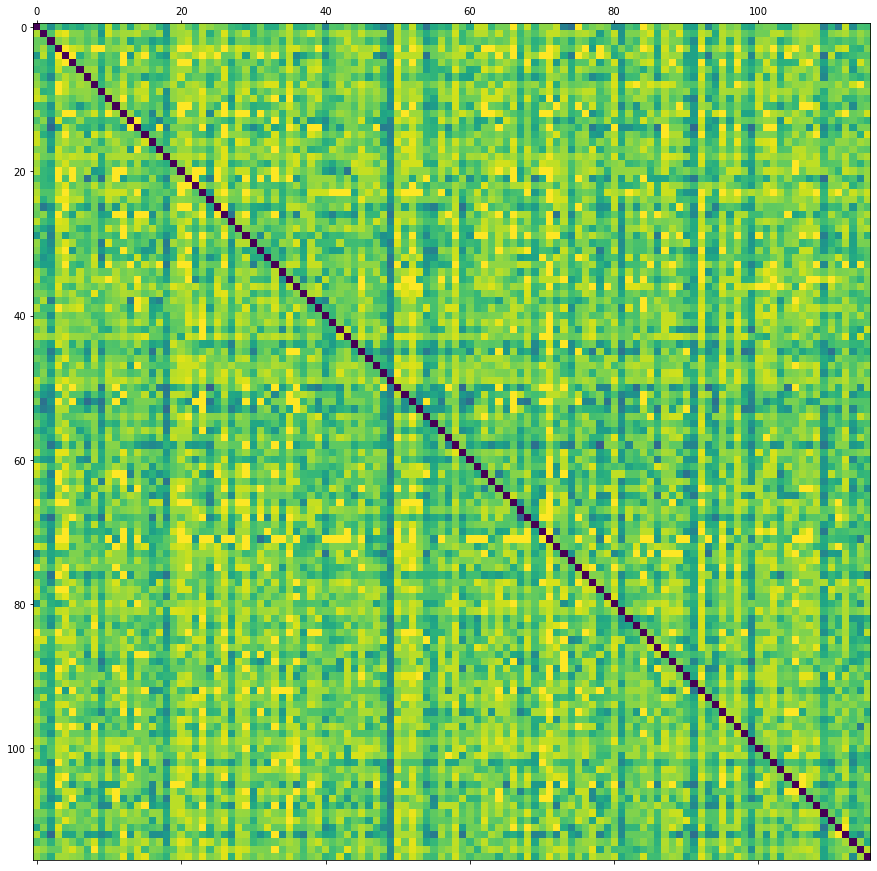

In [313]:
# visualizing edit distances

import matplotlib.pyplot as plt
f = plt.figure(figsize=(19, 15))
plt.matshow(distances,  fignum=f.number)
plt.show()